In [22]:
import numpy as np
import keras

In [23]:
data = np.loadtxt("ccdefaults.csv", delimiter=';')
np.random.shuffle(data)

In [24]:
print(data.shape)

(30000, 25)


In [25]:
n_training = 28000

x_train = data[:n_training,0:24]
y_train = data[:n_training,24]

x_val = data[n_training:,0:24]
y_val = data[n_training:,24]

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_train /= std

x_val -= mean
x_val /= std

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(24,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

Train on 28000 samples, validate on 2000 samples
Epoch 1/20
28000/28000 [==============================] - 0s 17us/step - loss: 0.6520 - acc: 0.6643 - val_loss: 0.5392 - val_acc: 0.7730
Epoch 2/20
28000/28000 [==============================] - 0s 11us/step - loss: 0.5008 - acc: 0.7996 - val_loss: 0.5016 - val_acc: 0.7930
Epoch 3/20
28000/28000 [==============================] - 0s 12us/step - loss: 0.4778 - acc: 0.8050 - val_loss: 0.4931 - val_acc: 0.7895
Epoch 4/20
28000/28000 [==============================] - 0s 12us/step - loss: 0.4708 - acc: 0.8047 - val_loss: 0.4906 - val_acc: 0.7910
Epoch 5/20
28000/28000 [==============================] - 0s 11us/step - loss: 0.4679 - acc: 0.8071 - val_loss: 0.4892 - val_acc: 0.7905
Epoch 6/20
28000/28000 [==============================] - 0s 12us/step - loss: 0.4665 - acc: 0.8083 - val_loss: 0.4887 - val_acc: 0.7910
Epoch 7/20
28000/28000 [==============================] - 0s 13us/step - loss: 0.4657 - acc: 0.8089 - val_loss: 0.4881 - val_acc:

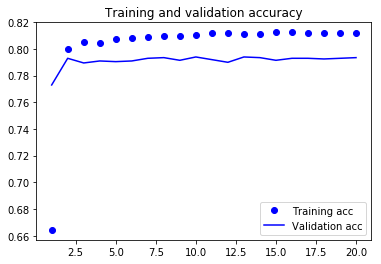

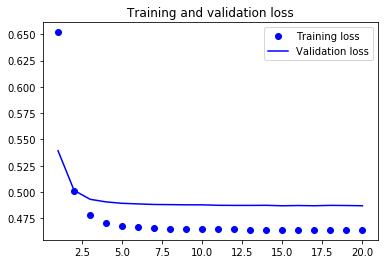

In [27]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
print(model.predict(x_val[3].reshape(-1,24)))

[[0.16613032]]
